# Ejercicio 2 - Parcial

Sea 𝑦 ∼Bi(𝑛,𝜃)con un prior conjugado para 𝜃:

## a)
Construir una aproximación normal de 𝑝(𝜃|𝑦) a partir de aproximar su logaritmo por una
función cuadrática de 𝜃.

### Desarrollo

A continuación dejo una imagen con el cálculo de las derivadas de la log-posterior:

![Calculos derivadas log-posterior parte 1](../../../imagenes/ejercicio_2_parcial2_1C2024_pt1.jpg)
![Calculos derivadas log-posterior parte 2](../../../imagenes/ejercicio_2_parcial2_1C2024_pt2.jpg)

## b)
Elegir valores numéricos para 𝑦, 𝑛 y los hiperparámetros del prior. Graficar y comparar la
distribución obtenida con la distribución exacta y con la aproximación normal basada en el
TCL. Dado un 𝑛 no muy grande, ¿cuál aproximación conviene cuando se tienen muy pocos
(o muchos) éxitos? Demostrar gráficamente.

### Desarrollo

Primero defino las funciones que servirán para hallar la moda de la log-posterior y tener la varianza:

In [15]:
def get_moda_log_posterior(y:int,  n: int, alpha, betha) -> float:
    return (y + alpha -1) / (n + alpha + betha -2)

def segunda_derivada_log_posterior(moda: float, y:int, n: int, alpha, betha) -> float:
    return -((y + alpha -1)/ moda**2  + (n + betha -y -1)/ (1-moda)**2)

Ahora le doy valores a cada parámetro y obtengo los valores que usaré para armar la aproximación normal:

In [21]:
import numpy as np

n = 30
y = 15
alpha = 1
betha = 1

moda = get_moda_log_posterior(y, n, alpha, betha)
I = -segunda_derivada_log_posterior(moda, y, n, alpha, betha)
std_aprox = np.sqrt(1/I)

print(f'moda: {moda}')
print(f'devio estandar: {std_aprox}')

moda: 0.5
devio estandar: 0.09128709291752768


Y ahora hago el gráfico comparando a la distribución exacta de la posterior contra la aproximación normal que hicimos y además la aproximación por TCL:

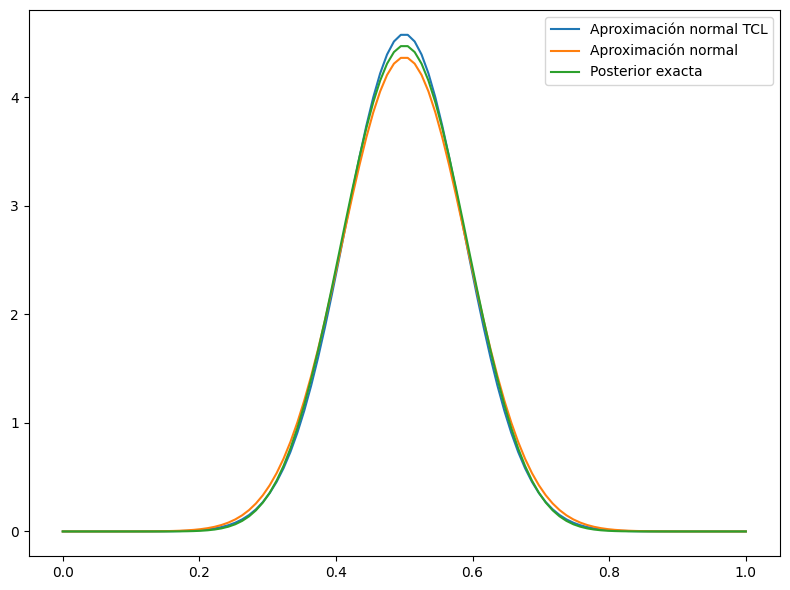

In [24]:
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import norm

x = np.linspace(0, 1, 100)

# Defino alpha y betha posteriores para la aproximacion de tcl
alpha_post = y + alpha
betha_post = n - y + betha

# Defino las aproximaciones y la posterior exacta
aprox_normal_tcl = norm.pdf(x, alpha_post / (alpha_post + betha_post), np.sqrt(alpha_post * betha_post / ((alpha_post + betha_post)**2 * (alpha_post + betha_post + 1))))
aprox_normal = norm.pdf(x, moda, std_aprox)
posterior_exacta = beta.pdf(x, y + alpha, n - y + betha)

# Grafico
plt.figure(figsize=(8, 6))
plt.plot(x, aprox_normal_tcl, label='Aproximación normal TCL')
plt.plot(x, aprox_normal, label='Aproximación normal')
plt.plot(x, posterior_exacta, label='Posterior exacta')
plt.legend()
plt.tight_layout()
plt.show()

En este gráfico podemos ver que la aproximación normal por TCL está más hacía arriba y que además se ajusta mejor a las colas de la posterior exacta, por lo tanto podemos decir que es una mejor aproximación.